# ME424 Modern Control and Estimation
## Tutorial #3 Solve Nonlinear Least Square Problem

In [2]:
# import related library
from numpy import random
from scipy import optimize

import numpy as np
import matplotlib.pyplot as plt


In [3]:
# this function should return the cost for any given value of theta
def nonlinearLScost(theta, b, y):
    J = 0
    for i in range(np.size(b, 1)):
        
        # np.linalg.norm(): axis=0 for column vector and axis=1 for row vector
        J+= np.square(y[i] - np.linalg.norm(theta - b[:, i], axis=0))        
    
    return J.item(0)


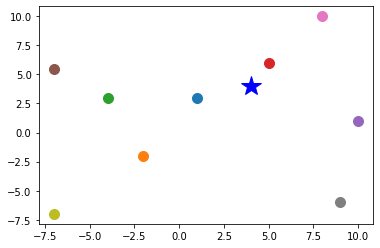

In [4]:
# first define known beacon positions
# each column represents one beacon position, e.g.: ith column b[:,i]:
# b[1,i] is the x-coordinate of the ith beacon, while b(2,i) is the y-coordinate of the ith beacon
b = np.mat([[1, -2, -4, 5, 10,  -7,  8,  9, -7],
            [3, -2,  3, 6,  1, 5.5, 10, -6, -7]])

# for testing purpose, we assume we know  the true location
# this is \theta to be estimated
truePose = np.transpose(np.mat([4, 0]))

# plot beacon and true target location
for i in range(np.size(b, 1)):
    plt.plot(b[0, i], b[1, i], 'o', ms=10)

plt.plot(truePose[0], truePose[0], 'b*', ms=20)


In [5]:
# for testing purpose, we generate measurement data
# in reality this data is given by your beacon sensors
noise = random.random(size=(np.size(b, 1), 1))
y = np.zeros(len(noise))
for i in range(len(noise)):
    y[i] = np.linalg.norm(truePose-b[:, i], axis=0) + noise[i]

# "theta" is the initial value
theta0 = np.mat('0;0')
# automatic iteration to convergence
#thetahatLS, resnorm = optimize.leastsq(nonlinearLScost, theta0, args=(b, y))

res = optimize.minimize(nonlinearLScost,theta0,args=(b,y))
thetahatLS = res.x

In [ ]:
res

      fun: 59.5203095981482
 hess_inv: array([[0.06893479, 0.        ],
       [0.        , 1.        ]])
      jac: array([1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.72488623, 0.        ])

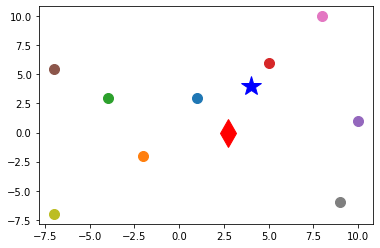

In [ ]:
# plot beacon and true target location
for i in range(np.size(b, 1)):
    plt.plot(b[0, i], b[1, i], 'o', ms = 10)

plt.plot(truePose[0],truePose[0],'b*',ms = 20)

# plot estimated location
plt.plot(thetahatLS[0],thetahatLS[1],'rd', ms=20)